In [1]:
# Netflix Data: Cleaning, Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\anami\Downloads\netflix_titles.csv.zip")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
data.shape

(8807, 12)

In [8]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
type_counts = data['type'].value_counts()
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

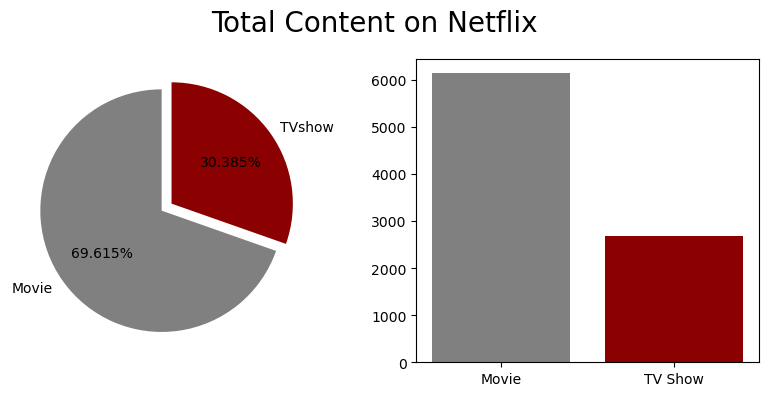

In [10]:
colors = ['#808080', '#8B0000']
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart
axs[0].pie(type_counts, labels=['Movie', 'TVshow'], autopct='%1.3f%%', explode=[0, 0.1], startangle=90, colors=colors)

# Bar chart
axs[1].bar(type_counts.index, type_counts.values, color=colors)
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.tight_layout()
plt.show()

In [41]:
top_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False).head(25)
top_countries

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


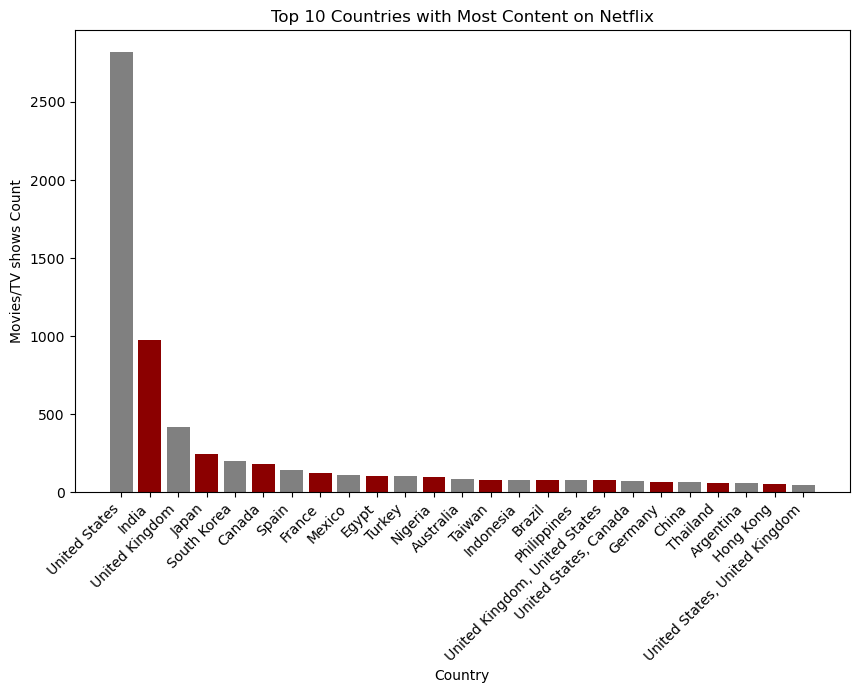

In [42]:
colors_bar = ['#808080', '#8B0000']
plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'], top_countries['count'], color=colors_bar)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Movies/TV shows Count' )
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

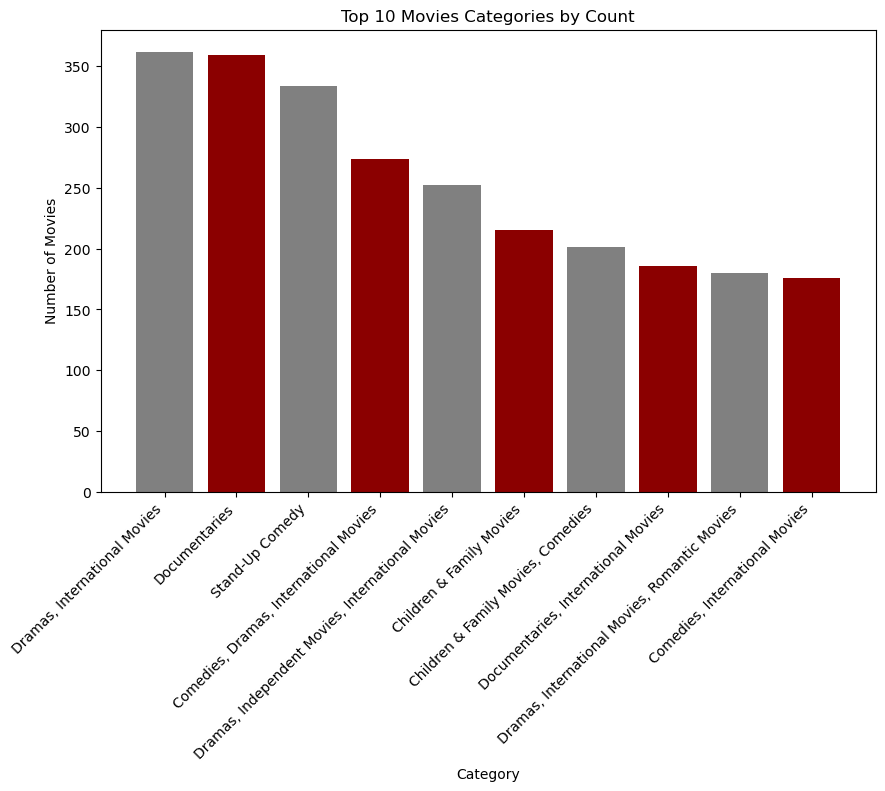

In [43]:
colors = ['#808080', '#8B0000']
top_10_movies_by_category = data[data['type'] == 'Movie'].groupby('listed_in').size().nlargest(10)
top_10_movies_by_category = top_10_movies_by_category.reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies_by_category['listed_in'], top_10_movies_by_category['count'], color=colors )
plt.title('Top 10 Movies Categories by Count')
plt.xlabel('Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.show()

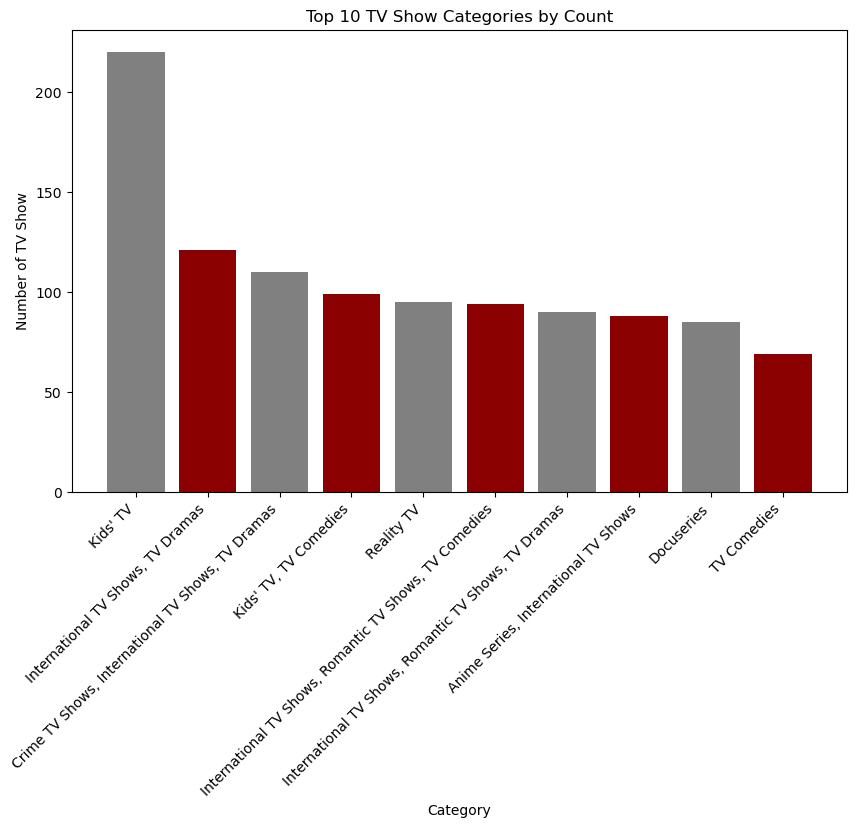

In [44]:
colors = ['#808080', '#8B0000']
top_10_TVShow_by_category = data[data['type'] == 'TV Show'].groupby('listed_in').size().nlargest(10)
top_10_TVShow_by_category = top_10_TVShow_by_category.reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(top_10_TVShow_by_category['listed_in'], top_10_TVShow_by_category['count'], color=colors )
plt.title('Top 10 TV Show Categories by Count')
plt.xlabel('Category')
plt.ylabel('Number of TV Show')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [45]:
Top_10_Directors= data['director'].value_counts()
Top_10_Directors.head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [46]:
num_of_director_movies = data.groupby(['director', 'type'])[ 'director'].value_counts().reset_index().head(10)
num_of_director_movies

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


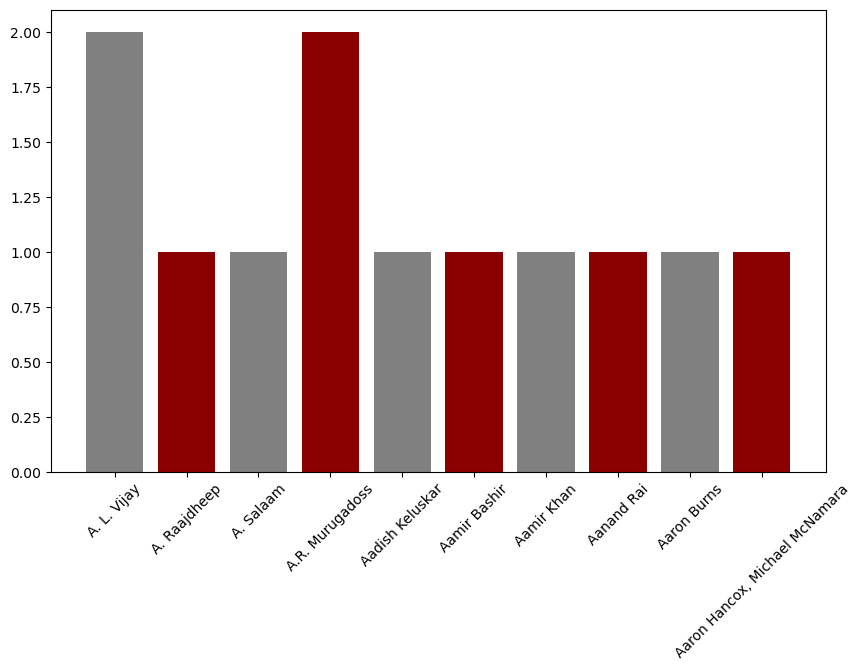

In [47]:
colors = ['#808080', '#8B0000']
plt.figure(figsize=(10, 6))
plt.bar(num_of_director_movies['director'],num_of_director_movies['count'], color=colors)
plt.xticks(rotation=45)
plt.show()



In [48]:
country = data['country'].value_counts().reset_index().sort_values(by='count',ascending = False).head(60)
country

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


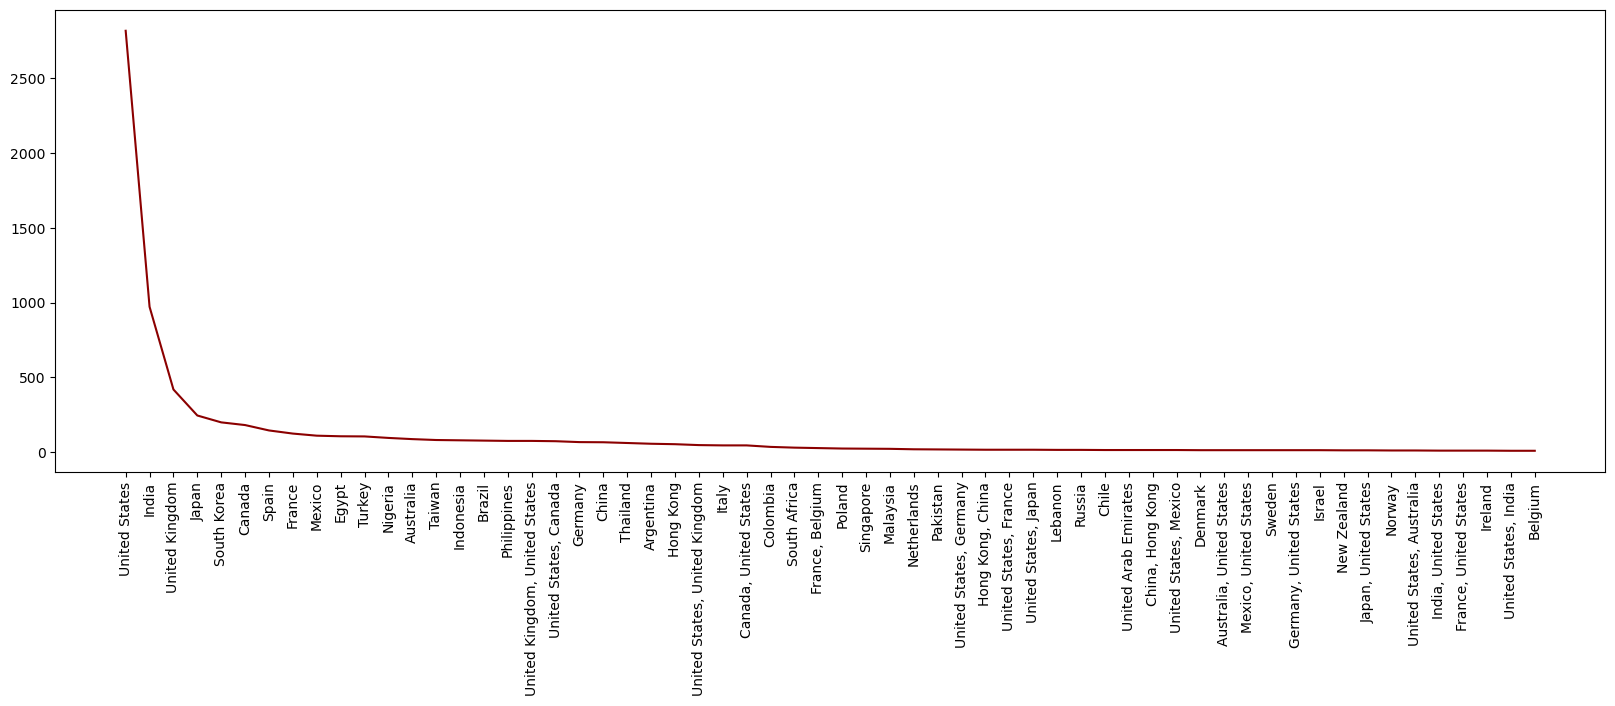

In [49]:
plt.figure(figsize=(20,6))
plt.plot(country['country'],country['count'],color='darkred')
plt.xticks(rotation=90)
plt.show()

In [50]:
#Top 15 country
country = data['country'].value_counts().reset_index().sort_values(by='count',ascending = False).head(10)
country

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


Text(0, 0.5, 'No of Movies')

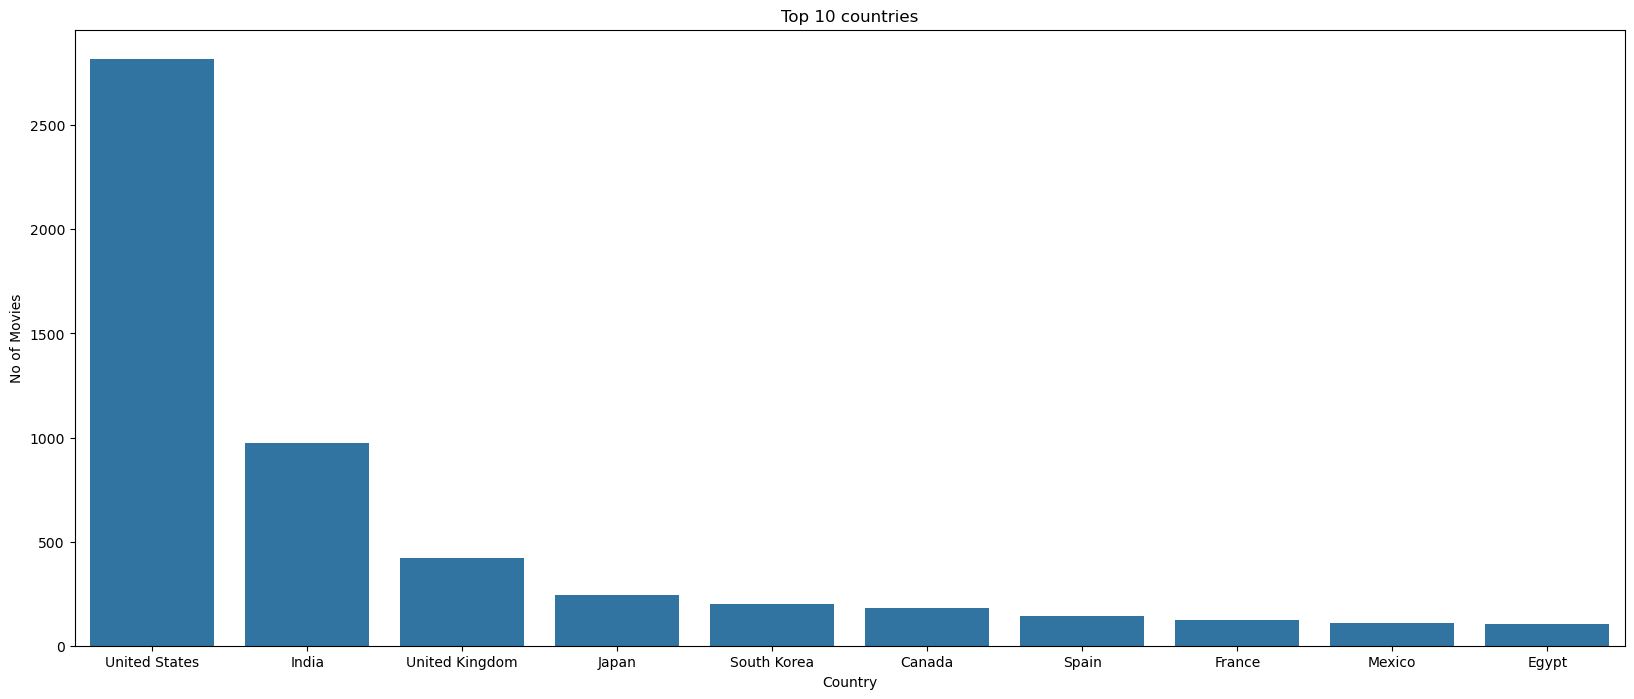

In [51]:
plt.figure(figsize=(20,8))
plt.title('Top 10 countries')
sns.barplot(x='country',y='count',data=country)
plt.xlabel('Country')
plt.ylabel('No of Movies')

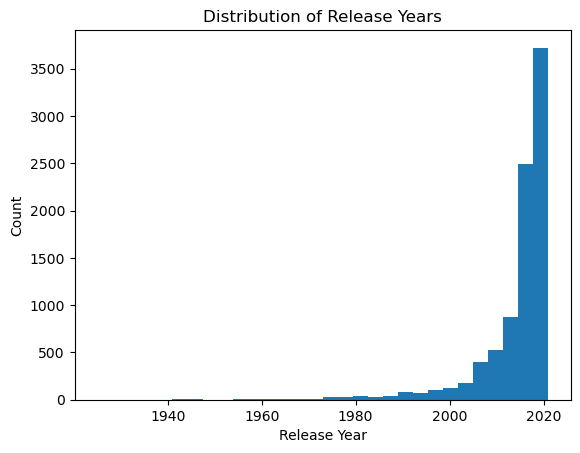

In [52]:
data['release_year'].plot(kind='hist', bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [53]:
ratings = data.groupby(['rating', 'type'])['type'].value_counts().reset_index()
ratings

,rating,type,count
0,66 min,Movie,1
1,74 min,Movie,1
2,84 min,Movie,1
3,G,Movie,41
4,NC-17,Movie,3
5,NR,Movie,75
6,NR,TV Show,5
7,PG,Movie,287
8,PG-13,Movie,490
9,R,Movie,797


In [54]:
top_10_movie_ratings = ratings[ratings['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_movie_ratings

,rating,type,count
15,TV-MA,Movie,2062
11,TV-14,Movie,1427
9,R,Movie,797
17,TV-PG,Movie,540
8,PG-13,Movie,490
7,PG,Movie,287
21,TV-Y7,Movie,139
19,TV-Y,Movie,131
13,TV-G,Movie,126
5,NR,Movie,75


In [58]:
durations = data.groupby(['duration', 'type'])['duration'].value_counts().reset_index()
durations

,duration,type,count
0,1 Season,TV Show,1793
1,10 Seasons,TV Show,7
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


In [59]:
top_10_movie_durations = durations[durations['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_movie_durations

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
215,95 min,Movie,137
216,96 min,Movie,130
212,92 min,Movie,129
5,102 min,Movie,122
218,98 min,Movie,120


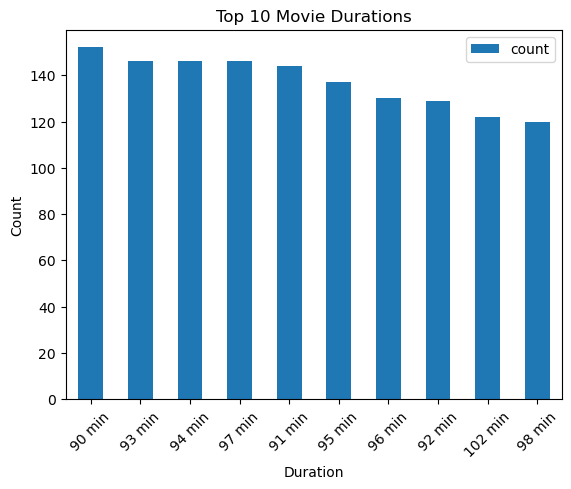

In [61]:
top_10_movie_durations.plot(x='duration', y='count', kind='bar')
plt.title('Top 10 Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [62]:
top_10_TV_Show_durations = durations[durations['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_TV_Show_durations

,duration,type,count
0,1 Season,TV Show,1793
110,2 Seasons,TV Show,425
138,3 Seasons,TV Show,199
151,4 Seasons,TV Show,95
162,5 Seasons,TV Show,65
174,6 Seasons,TV Show,33
185,7 Seasons,TV Show,23
196,8 Seasons,TV Show,17
208,9 Seasons,TV Show,9
1,10 Seasons,TV Show,7


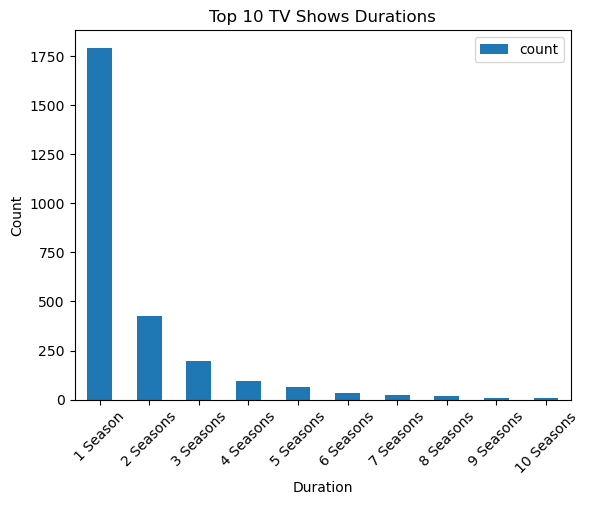

In [63]:
top_10_TV_Show_durations.plot(x='duration', y='count', kind='bar')
plt.title('Top 10 TV Shows Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [72]:
#category

In [73]:
listed_in = data.groupby(['listed_in', 'type'])['listed_in'].value_counts().reset_index()
listed_in

,listed_in,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
509,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
510,"TV Horror, Teen TV Shows",TV Show,2
511,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
512,TV Shows,TV Show,16


In [76]:
top_10_listed_in_movie = listed_in[listed_in['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_listed_in_movie

,listed_in,type,count
326,"Dramas, International Movies",Movie,362
274,Documentaries,Movie,359
470,Stand-Up Comedy,Movie,334
200,"Comedies, Dramas, International Movies",Movie,274
319,"Dramas, Independent Movies, International Movies",Movie,252
121,Children & Family Movies,Movie,215
125,"Children & Family Movies, Comedies",Movie,201
281,"Documentaries, International Movies",Movie,186
329,"Dramas, International Movies, Romantic Movies",Movie,180
217,"Comedies, International Movies",Movie,176


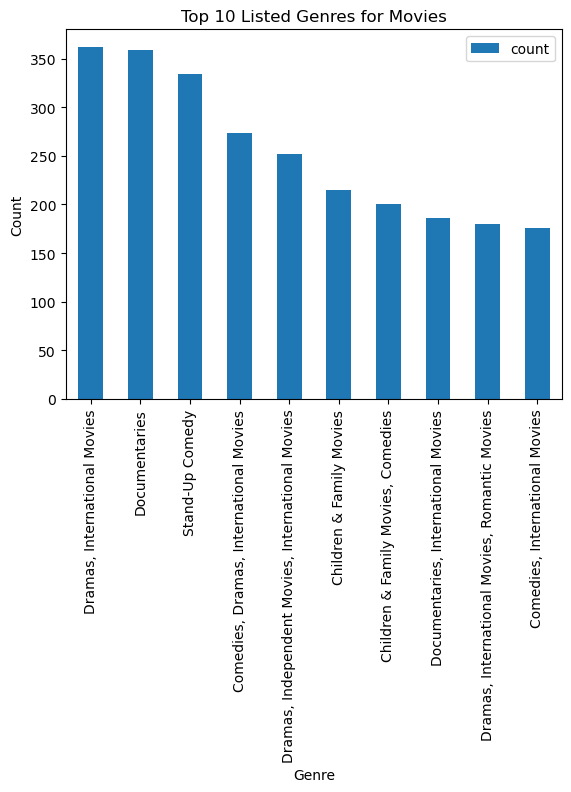

In [78]:
top_10_listed_in_movie.plot(x='listed_in', y='count', kind='bar')
plt.title('Top 10 Listed Genres for Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [80]:
top_10_listed_in_TV_Show = listed_in[listed_in['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_listed_in_TV_Show

,listed_in,type,count
422,Kids' TV,TV Show,220
412,"International TV Shows, TV Dramas",TV Show,121
244,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110
433,"Kids' TV, TV Comedies",TV Show,99
446,Reality TV,TV Show,95
393,"International TV Shows, Romantic TV Shows, TV ...",TV Show,94
394,"International TV Shows, Romantic TV Shows, TV ...",TV Show,90
80,"Anime Series, International TV Shows",TV Show,88
291,Docuseries,TV Show,85
487,TV Comedies,TV Show,69


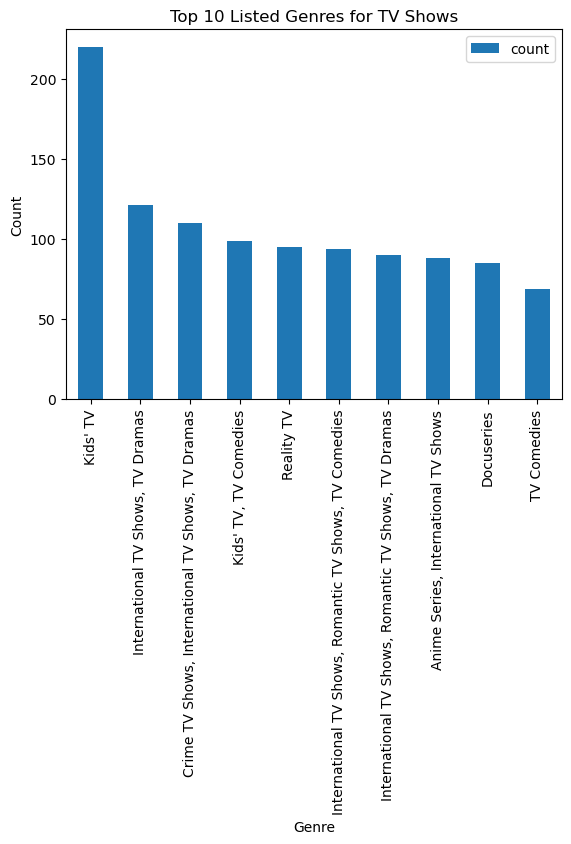

In [81]:
top_10_listed_in_TV_Show.plot(x='listed_in', y='count', kind='bar')
plt.title('Top 10 Listed Genres for TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()